In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import seaborn as sns
sns.set_style("whitegrid")

from skimage import measure

## Reading in data from ninja csv files

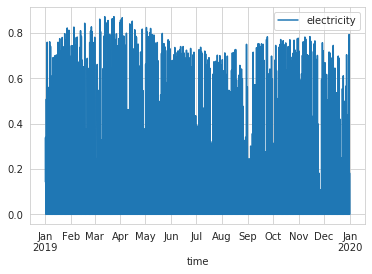

In [78]:
df1 = pd.read_csv("ninja_pv_33.4283_126.4630_uncorrected.csv", skiprows=3)
df1 = df1.set_index(pd.DatetimeIndex(df1.time))[["electricity"]]

df1.plot()

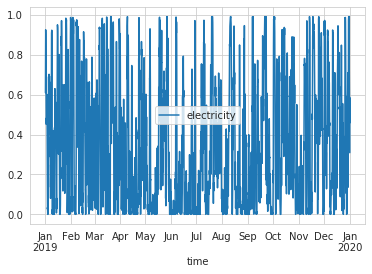

In [79]:
df2 = pd.read_csv("ninja_wind_33.4283_126.4630_uncorrected.csv", skiprows=3)
df2 = df2.set_index(pd.DatetimeIndex(df2.time))[["electricity"]]

df2.plot()

## Selecting a few days in summer

In [80]:
split = lambda d : d.loc["2019-08-08":"2019-08-18"]
tmp1 , tmp2 = split(df1), split(df2)

Text(0.5, 1.0, 'Estimated Wind and Solar Power Output of the imaginary plant in Jeju')

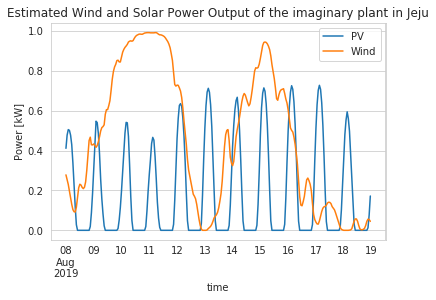

In [82]:
ax = tmp1.electricity.plot(label="PV")
tmp2.electricity.plot(ax=ax, label="Wind")
plt.ylabel("Power [kW]")
plt.legend()
plt.title("Estimated Wind and Solar Power Output of the imaginary plant in Jeju")

## Volumetric data and different visualizations

In [70]:
arr = np.ones((len(tmp1), len(tmp2)))
for idx in range(len(tmp1)):
    arr[idx, :len(tmp1)] = (tmp1.iloc[idx].electricity *10 + tmp2.electricity * 10)

In [65]:
xv, yv = np.meshgrid(range(len(tmp1)), range(len(tmp1)), sparse=False, indexing='ij')

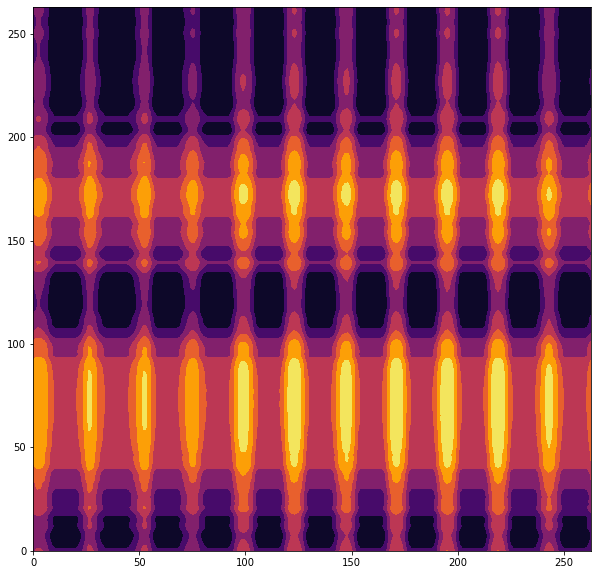

In [71]:
fig = plt.figure(figsize=(10,10))
plt.contourf(xv, yv, arr, cmap="inferno")

Text(0.5, 0, 'z-axis: PV + Wind [kW]')

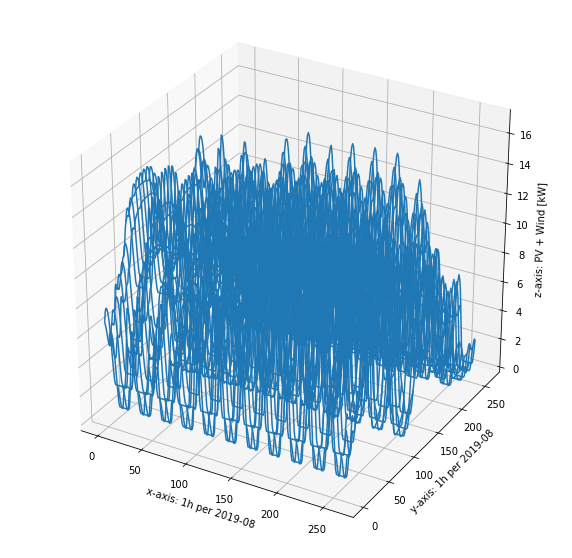

In [72]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(xv, yv, arr)

ax.set_xlabel("x-axis: 1h per 2019-08")
ax.set_ylabel("y-axis: 1h per 2019-08")
ax.set_zlabel("z-axis: PV + Wind [kW]")

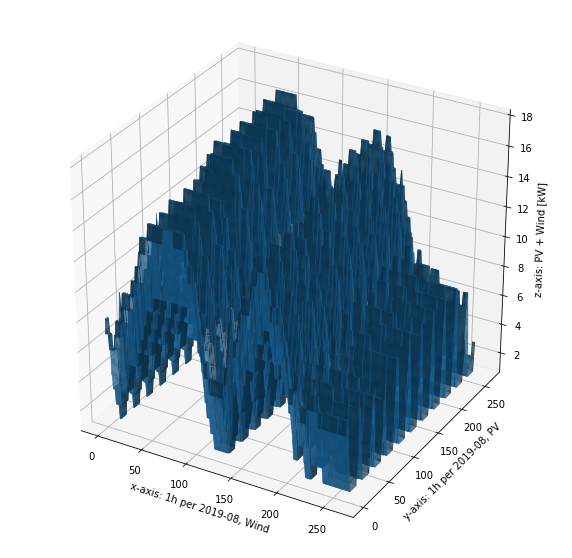

In [76]:
weird = np.stack([(arr>=i).astype(float) for i in range(0, 20)])
weird = np.swapaxes(weird, 0, 2)

verts, faces, normals, values = measure.marching_cubes(weird, 0)


mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2],
                linewidth=0.2, antialiased=True)

ax.set_xlabel("x-axis: 1h per 2019-08, Wind")
ax.set_ylabel("y-axis: 1h per 2019-08, PV")
ax.set_zlabel("z-axis: PV + Wind [kW]")

plt.show()

## Numpy array to Wavefront Object file

In [84]:
arr_to_write = np.stack([(arr>=i).astype(float) for i in range(0, 20)])
arr_to_write = np.swapaxes(arr_to_write, 0, 1)

verts, faces, normals, values = measure.marching_cubes(arr_to_write, 0)

faces=faces +1

thefile = open('test.obj', 'w')
for item in verts:
  thefile.write("v {0} {1} {2}\n".format(item[0],item[1],item[2]))

for item in normals:
  thefile.write("vn {0} {1} {2}\n".format(item[0],item[1],item[2]))

for item in faces:
  thefile.write("f {0}//{0} {1}//{1} {2}//{2}\n".format(item[0],item[1],item[2]))  

thefile.close()